In [42]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [43]:
# Read Training Data
train = pd.read_csv('train.csv')

In [44]:
# Check for Missing values
train.isnull().sum(axis = 0)

Id                  0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
# Check distribution of data
train.describe()

,Id,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,3520.088569,0.161519,32.075790,64.671166
std,2028.634870,0.368042,24.492631,30.177218
min,0.000000,0.000000,0.000000,18.250000
25%,1767.250000,0.000000,9.000000,35.275000
50%,3512.000000,0.000000,28.000000,70.350000
75%,5282.750000,0.000000,55.000000,90.050000
max,7042.000000,1.000000,72.000000,118.750000


In [46]:
# Drop unnecessary columns
train.drop(['Id','customerID'], axis = 1, inplace = True)

In [47]:
# change columns with 'No internet connection' entries to just 'No'
noc = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in noc:
    train[i] = train[i].apply(lambda x : 'No' if x == 'No internet service' else x)
    
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,27,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),20.25,538.2,No
1,Male,0,Yes,Yes,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Electronic check,19.75,19.75,No
2,Female,0,No,No,17,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
3,Female,1,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes
4,Male,0,Yes,No,23,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406,No


In [48]:
# change variable entries for encoding convienience
ch = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
for i in ch:
    train[i] = train[i].apply(lambda x: i + '_'+x)
    
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,gender_Female,0,Partner_No,Dependents_No,27,PhoneService_Yes,MultipleLines_No,InternetService_No,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),20.25,538.2,No
1,gender_Male,0,Partner_Yes,Dependents_Yes,1,PhoneService_Yes,MultipleLines_No,InternetService_No,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,Month-to-month,PaperlessBilling_No,PaymentMethod_Electronic check,19.75,19.75,No
2,gender_Female,0,Partner_No,Dependents_No,17,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_Yes,TechSupport_No,StreamingTV_No,StreamingMovies_No,Month-to-month,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),80.05,1345.65,No
3,gender_Female,1,Partner_No,Dependents_No,42,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_Yes,StreamingMovies_No,Month-to-month,PaperlessBilling_Yes,PaymentMethod_Electronic check,84.65,3541.35,Yes
4,gender_Male,0,Partner_Yes,Dependents_No,23,PhoneService_Yes,MultipleLines_No,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_Yes,Month-to-month,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),59.95,1406,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,gender_Male,0,Partner_Yes,Dependents_Yes,68,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,OnlineSecurity_No,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_No,StreamingMovies_Yes,One year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),75.80,5293.95,Yes
5630,gender_Female,0,Partner_Yes,Dependents_Yes,65,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Two year,PaperlessBilling_Yes,PaymentMethod_Mailed check,90.45,5957.9,No
5631,gender_Male,0,Partner_No,Dependents_No,24,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_Yes,TechSupport_No,StreamingTV_Yes,StreamingMovies_No,Month-to-month,PaperlessBilling_Yes,PaymentMethod_Mailed check,89.85,2165.05,Yes
5632,gender_Female,0,Partner_Yes,Dependents_No,1,PhoneService_Yes,MultipleLines_No,InternetService_DSL,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_Yes,StreamingMovies_No,Month-to-month,PaperlessBilling_No,PaymentMethod_Mailed check,55.20,55.2,Yes


In [49]:
#one-hot encoding nominal feature
oh = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

for i in oh:
    xx = pd.get_dummies(train[i])
    train = pd.concat([train,xx], axis = 'columns')
    train.drop([i,train.columns[-1]], axis = 1, inplace = True)
    
train.head(5)

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,Partner_No,Dependents_No,PhoneService_No,...,OnlineSecurity_No,OnlineBackup_No,DeviceProtection_No,TechSupport_No,StreamingTV_No,StreamingMovies_No,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,27,Two year,20.25,538.2,No,1,1,1,0,...,1,1,1,1,1,1,0,1,0,0
1,0,1,Month-to-month,19.75,19.75,No,0,0,0,0,...,1,1,1,1,1,1,1,0,0,1
2,0,17,Month-to-month,80.05,1345.65,No,1,1,1,0,...,1,1,0,1,1,1,1,1,0,0
3,1,42,Month-to-month,84.65,3541.35,Yes,1,1,1,0,...,1,1,1,1,0,1,0,0,0,1
4,0,23,Month-to-month,59.95,1406,No,0,0,1,0,...,0,1,1,1,1,0,0,1,0,0


In [50]:
# treating empty spaces in "totalcharges" feature
train["TotalCharges"] = train["TotalCharges"].apply(lambda x: 0 if x == ' ' else x)
train["TotalCharges"] = train["TotalCharges"].astype('float')

In [51]:
# encoding target variables
train['Churn'] = train['Churn'].apply(lambda x: float(1) if x == "Yes" else float(0))

In [52]:
# Label-encoding ordinal features
le = LabelEncoder()
train['Contract'] = le.fit_transform(train['Contract'])

Text(0, 0.5, 'Number of Customers')

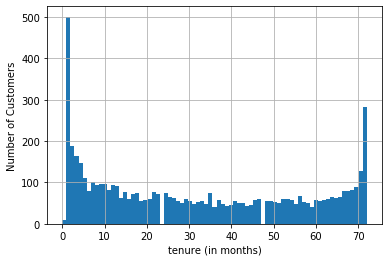

In [53]:
train.tenure.hist(bins = 75)
plt.xlabel('tenure (in months)')
plt.ylabel('Number of Customers')

Text(0.5, 0, 'Monthly Charges')

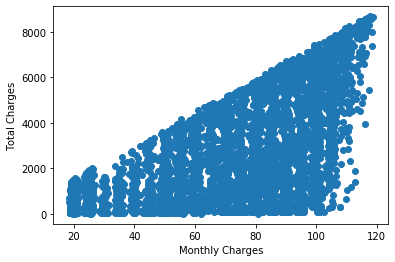

In [54]:
plt.scatter(train.MonthlyCharges, train.TotalCharges)
plt.ylabel('Total Charges')
plt.xlabel('Monthly Charges')

In [55]:
s_citizen = train.SeniorCitizen.value_counts(normalize = True)[1]
print('percentace of senior citizens = {} %'.format(round(s_citizen*100,2)))
#plt.scatter(train.TotalCharges, train.Contract)

percentace of senior citizens = 16.15 %


 0 : Not senior citizen
 1 : senior citizen


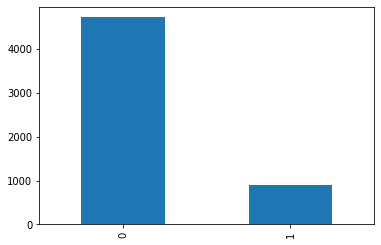

In [56]:
train.SeniorCitizen.value_counts().plot(kind = 'bar')
plt.ylabel('')
print(' 0 : Not senior citizen')
print(' 1 : senior citizen')

### Model building

In [57]:
# Split Data into Features & target
y = train['Churn']
X = train.drop('Churn', axis = 1)

# split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [58]:
#AdaBoost
adb = AdaBoostClassifier()
ypred = adb.fit(X_train,y_train).predict(X_test)

score = accuracy_score(y_test,ypred)
print('accuracy score : ', score)

accuracy score :  0.8007096392667061


In [59]:
# XGBoost
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

ypred_train = xgb_clf.predict(X_train)
ypredxgb = xgb_clf.predict(X_test)

#check accuracy score for both training and testing data
xgb_score_train = accuracy_score(y_train, ypred_train)
xgb_score = accuracy_score(y_test, ypredxgb)

print('train accuracy: ', xgb_score_train)
print('test accuracy: ', xgb_score)

train accuracy:  0.9634795840730408
test accuracy:  0.7806031933767001


In [60]:
# XGBoost Hyperparameter tuning
grid = {'max_depth':[1],
        'gamma':[0],
        'subsample':[0.95],
        'colsample_bytree':[0.75],
        'reg_alpha':[0],
        'learning_rate' : [0.1,0.15,0.2,0.3],
        'min_child_weight':[3],
        'n_estimators': [150,200,250,300],
}
model = XGBClassifier()
gridcv = GridSearchCV(estimator=model, param_grid=grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
gridcv.fit(X_train, y_train)

# summarize the results of the grid search
print('best score : ',gridcv.best_score_)
print('best estimator : ',gridcv.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   13.9s finished


best score :  0.8072523209357086
best estimator :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=1,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [61]:
model = XGBClassifier(max_depth = 1, gamma = 0, subsample = 0.95, colsample_bytree = 0.75, reg_alpha = 0,
                      learning_rate = 0.3, min_child_weight = 3, n_estimators = 150)
model.fit(X_train, y_train)
y_predxgb = model.predict(X_test)
ypred_train = model.predict(X_train)

xgb_score_train = accuracy_score(y_train, ypred_train)
xgb_score = accuracy_score(y_test, ypredxgb)

print('After Hyper-parameter tuning')
print('train accuracy: ', xgb_score_train)
print('test accuracy: ', xgb_score)

After Hyper-parameter tuning
train accuracy:  0.8161298503677403
test accuracy:  0.7806031933767001


### Prediction on the test data and creating the sample submission file.

In [62]:
# Code Starts here
test = pd.read_csv('test.csv')
id_ = test['Id'].copy()

#Drop unneccsary columns
test.drop(['Id','customerID'], axis = 1, inplace = True)

# change columns with 'No internet connection' entries to just 'No'
noc = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in noc:
    test[i] = test[i].apply(lambda x : 'No' if x == 'No internet service' else x)
    
# Code ends here

In [63]:
#Change columns entries for better encoding
ch = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
for i in ch:
    test[i] = test[i].apply(lambda x: i + '_'+x) 

In [64]:
# one-hot encoding nomianl categorical columns
oh = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

for i in oh:
    xx = pd.get_dummies(test[i])
    test = pd.concat([test,xx], axis = 'columns')
    test.drop([i,test.columns[-1]], axis = 1, inplace = True)
    

In [65]:
# Treating blank values in "TotalCharges" variable
test["TotalCharges"] = test["TotalCharges"].apply(lambda x: 0 if x == ' ' else x)
test["TotalCharges"] = test["TotalCharges"].astype('float')
#test['Churn'] = test['Churn'].apply(lambda x: float(1) if x == "Yes" else float(0))

# Treating blank values in Target variable
le = LabelEncoder()
test['Contract'] = le.fit_transform(test['Contract'])

In [66]:
# predict and export data
test_pred = xgb_clf.predict(test)
print(test_pred[:10])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [67]:
# Convert & Export data for submission
subb = pd.DataFrame({'Id':id_ , 'Churn': test_pred})
subb['Churn'] = subb['Churn'].apply(lambda x: 'Yes' if x == 1 else 'No')
#subb.to_csv('sub.csv', index = False)